# Logistic Regression

## A probabilistic model:

1. Odds ratio: $\frac{p}{1-p}$
2. Logit function: $logit(p) = log \frac{p}{1-p}$ \
Logit fuction takes as input values in the range 0 to 1 and transforms them to values over the entire real-number range:
$logit(p(y=1|x)) = w^Tx$
3. Logistic sigmoid function: $\phi(z) = \frac{1}{1+e^{-z}}$, where $z = w^Tx$ \
$$ \hat{y} =  \begin{cases}
    1 & if\phi(z) \geq 0.5 \\
    0 & otherwise
        \end{cases}  $  
$ \hat{y} =  \begin{cases}
    1 & if z \geq 0.0 \\
    0 & otherwise
        \end{cases}  $$

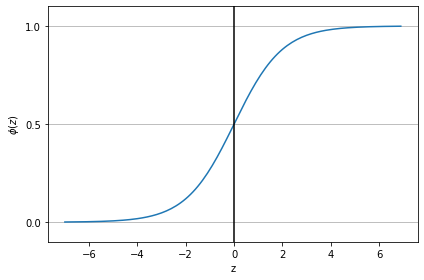

In [2]:
# Sigmoid function

import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
plt.show()

## Cost function
$J(w) = \sum_{i} \frac{1}{2}(\phi(z^{(i)} - y^{(i)})^2$  \
$J(w) = \sum_{i=1}^n [-y^{(i)}log(\phi(z^{(i)}))-(1-y^{(i)})log(1-\phi(z^{(i)}))]$ \
It penalizes wrong predictions with an increasingly larger cost.

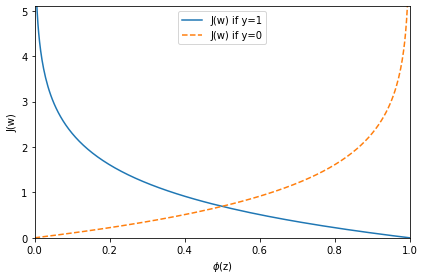

In [4]:
# plot the cost function
def cost_1(z):
    return - np.log(sigmoid(z))


def cost_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')

c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Logistic regression in sklearn

sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

- penalty: 'l1’, ‘l2’, ‘elasticnet’, ‘none’
- C: Inverse of regularization strength

attributes:
- coef_0

In [5]:
# Iris data with standardization
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [6]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 100.0, random_state = 1)
lr.fit(X_train_std, y_train)
lr.predict(X_test_std)

array([2, 0, 0, 1, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0])

**Note:** one of the biggest advantages of logistic regression model is that it allows us to derive the conditional probatilities.

In [8]:
# probability that a sample belongs to a certain class
lr.predict_proba(X_test_std)  #get predicted probability
lr.predict_proba(X_test_std).argmax(axis = 1) #get predicted label

array([2, 0, 0, 1, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0])

 ## Tackling overfitting via regularization: bias-variance trade-off
 
 1. Overfitting: a model performs well on training data but does not generalize well to unseen data; model with high variance, which can be caused by having too many parameters that lead to a model that is too complex given the underlying data;
 2. Underfitting: a model is not complex enough to capture the pattern in the training data well and therefore also suffers from low performance on unseen data;
 3. Variance: measures the consistency of the model prediction for a particular sample instance if we were to retrain the model multiple times; model is sensitive to the randomness in the training data;
 4. Bias: measures how far off the predictions are from the correct values in general if we rebuild the model multiple times on different training datasets; it is a measure of systematic erros that is not dut to randomeness;

### Regularization

- a technique to handle collinearity, filter out noise from data and eventually prevent overfitting
- introcduce additional information (bias) to pernalize extreme parameter(weight) values
- **L1 regularization:** $\lambda||w||_1 = \lambda\sum_{j=1}^{m}|w_j|$ penalizes large individual weights
- **L2 regularization:** $\lambda||w||_2^2 = \lambda\sum_{j=1}^{m}w_j^2$ usually yields sparse feature vectors -- feautre selection, and applies to high-dimensional dataset with many feautres that are irrelevant
- $\lambda$: regularization parameter. In sklearn, C is the inverse of $\lambda$, $ C = \frac{1}{\lambda}$
- **Note:** feature scaling before regularization